# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (6,5)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [47]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [48]:
df.shape

(32561, 15)

In [49]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [50]:
new_column_names = {
    'education.num': 'education_num',
    'marital.status': 'marital_status',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week',
    'native.country': 'native_country'
}

df.rename(columns=new_column_names, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [53]:
missing_data = df[df.apply(lambda row: any(x == "?" for x in row), axis=1)]
missing_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [54]:
df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)
df['native_country'].replace('?', df['native_country'].mode()[0], inplace=True)

In [55]:
missing_data = df[df.apply(lambda row: any(x == "?" for x in row), axis=1)]
missing_data.sum()

age              0.000
workclass        0.000
fnlwgt           0.000
education        0.000
education_num    0.000
marital_status   0.000
occupation       0.000
relationship     0.000
race             0.000
sex              0.000
capital_gain     0.000
capital_loss     0.000
hours_per_week   0.000
native_country   0.000
income           0.000
dtype: float64

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education_num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital_gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital_loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours_per_week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [57]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [58]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

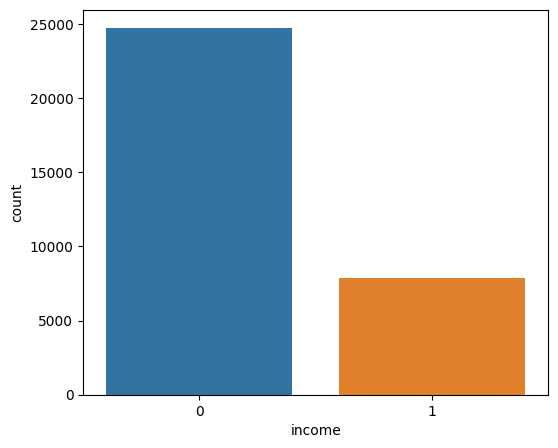

In [59]:
sns.countplot(df.income)
plt.show()

In [60]:
df.duplicated().sum()

24

In [61]:
df.drop_duplicates(inplace = True)

In [62]:
df.drop(['native_country'], axis =1, inplace = True)

In [63]:
df.drop("education_num", axis = 1, inplace = True)

In [64]:
df.head(1)

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,0


In [65]:
df.shape

(32537, 13)

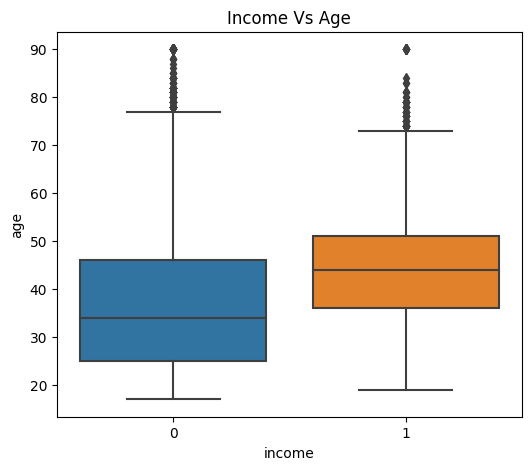

In [66]:
sns.boxplot(x = df.income ,y = df.age);
plt.title('Income Vs Age');

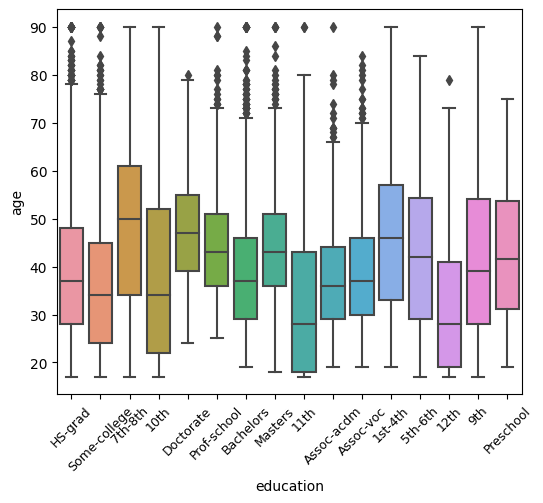

In [67]:
sns.boxplot(x = df.education, y = df.age);
plt.xticks(rotation = 45, fontsize = (9));

In [68]:
df.groupby('sex')['income'].mean().sort_values(ascending=False)

sex
Male     0.306
Female   0.110
Name: income, dtype: float64

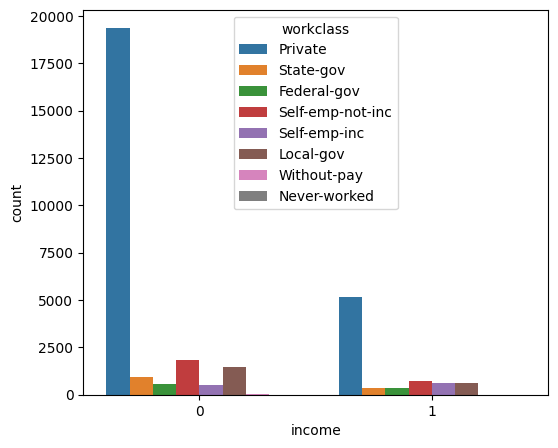

In [69]:
sns.countplot(data = df, x = 'income', hue = 'workclass');

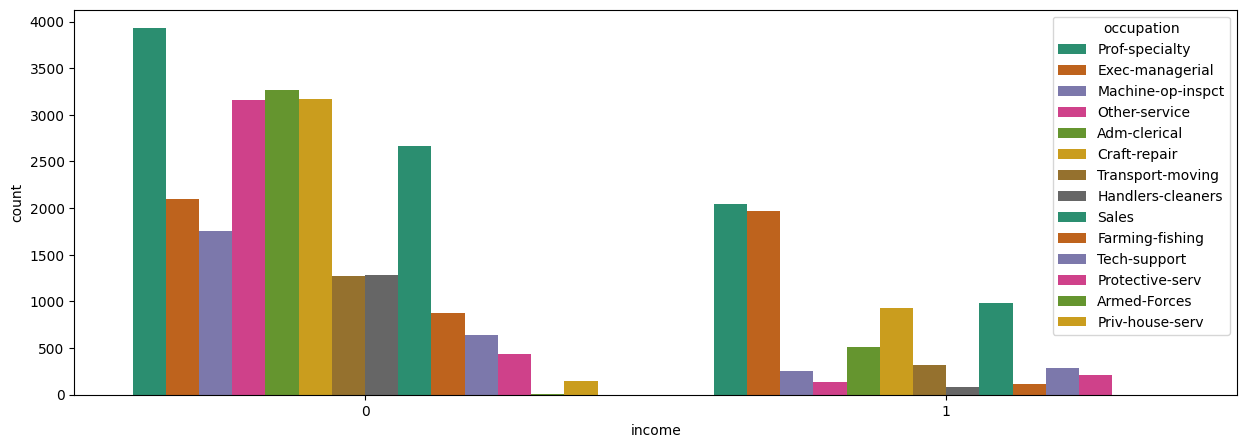

In [70]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'income', hue = 'occupation', palette='Dark2');

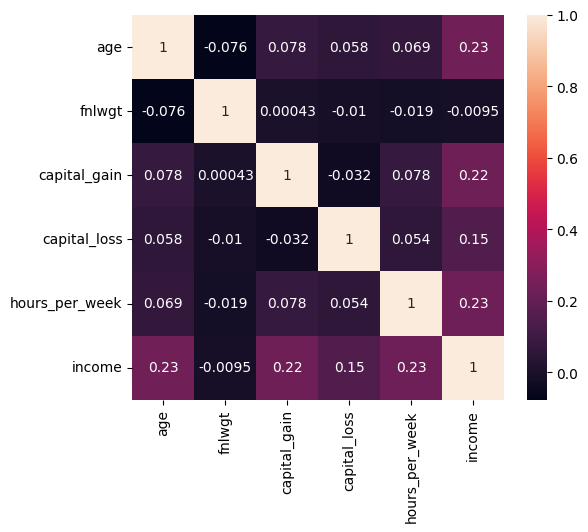

In [71]:
sns.heatmap(df.corr(), annot = True);

In [72]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'])

In [73]:
df

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,90,77053,0,4356,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,82,132870,0,4356,18,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,66,186061,0,4356,40,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,54,140359,0,3900,40,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
4,41,264663,0,3900,40,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
32557,27,257302,0,0,38,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
32558,40,154374,0,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
32559,58,151910,0,0,40,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


# Logistic Regression

## Train | Test Split

In [74]:
X = df.drop(["income"], axis = 1)
y = df["income"]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Pipeline

In [77]:
scaler =StandardScaler()
log_model = LogisticRegression()

In [78]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 

In [79]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [80]:
y_pred=log_pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[0.61489572, 0.38510428],
       [0.53585961, 0.46414039],
       [0.54278476, 0.45721524],
       ...,
       [0.99838311, 0.00161689],
       [0.9917752 , 0.0082248 ],
       [0.99834975, 0.00165025]])

## Model Performance

In [82]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    

In [83]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 


Test_Set
[[4601  339]
 [ 636  932]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4940
           1       0.73      0.59      0.66      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.76      0.78      6508
weighted avg       0.84      0.85      0.84      6508


Train_Set
[[18406  1352]
 [ 2516  3755]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19758
           1       0.74      0.60      0.66      6271

    accuracy                           0.85     26029
   macro avg       0.81      0.77      0.78     26029
weighted avg       0.84      0.85      0.85     26029



## GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
model = Pipeline([("scaler",scaler),("log_model",log_model)]) 

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 

# -1 ile 5 arasında 20 tane C değeri elde etmek için 
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, düzenlileştirmenin optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 20) 

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight= ["balanced", None] 
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["liblinear", "sag", "saga"] 

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : C,
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

# en iyi modeli elde etmek için
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'f1',   # Default olarak 1 sınıfının scorunu max. eder    
                          n_jobs = -1) # bütün işlemciler burda çalışsın diye

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [89]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'sag', 'saga']},
             scoring='f1')

In [90]:
grid_model.best_params_

{'log_model__C': 0.1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [91]:
grid_model.best_score_

0.6811116884010455

In [92]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[3935 1005]
 [ 272 1296]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4940
           1       0.56      0.83      0.67      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.81      0.77      6508
weighted avg       0.85      0.80      0.81      6508


Train_Set
[[15695  4063]
 [  903  5368]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     19758
           1       0.57      0.86      0.68      6271

    accuracy                           0.81     26029
   macro avg       0.76      0.83      0.77     26029
weighted avg       0.85      0.81      0.82     26029



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [93]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

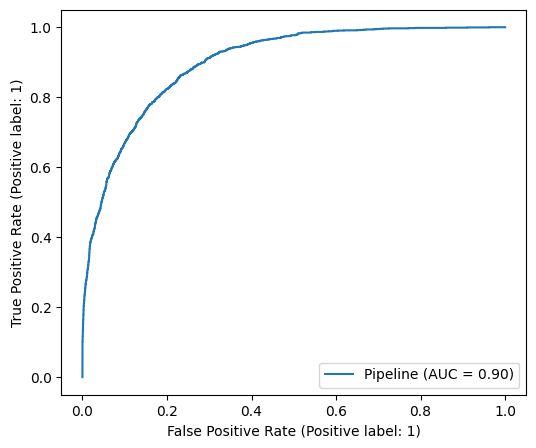

In [94]:
plot_roc_curve(log_pipe, X_test, y_test);

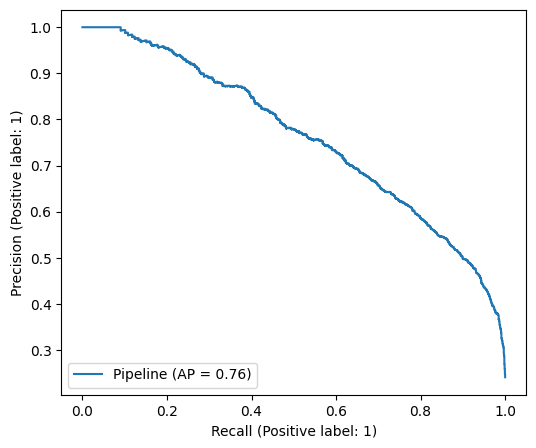

In [95]:
plot_precision_recall_curve(log_pipe, X_test, y_test);

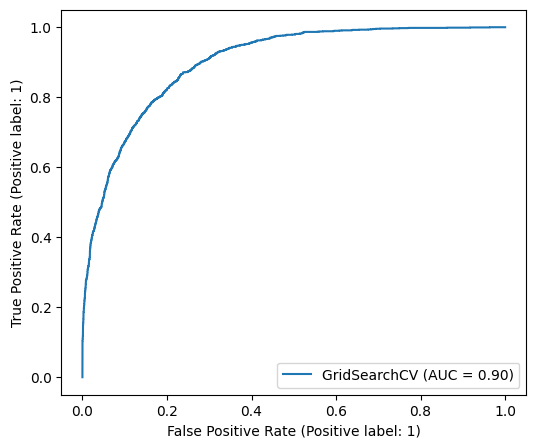

In [96]:
plot_roc_curve(grid_model, X_test, y_test); 

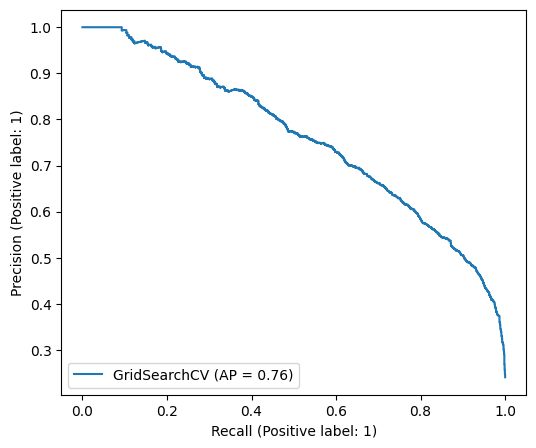

In [97]:
plot_precision_recall_curve(grid_model, X_test, y_test);

# K-Nearest Neighbors (KNN) Classification

In [98]:
scaler = StandardScaler()

In [99]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 

In [101]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [102]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [103]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [104]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000,0.000
1,0.600,0.400
2,0.000,1.000
3,1.000,0.000
4,1.000,0.000
...,...,...
6503,0.400,0.600
6504,0.600,0.400
6505,1.000,0.000
6506,1.000,0.000


In [105]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [106]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
30550,0,0,0.000,1.000
7162,0,0,0.400,0.600
8958,1,0,0.000,1.000
2252,1,0,0.400,0.600
28914,0,0,0.000,1.000
21095,0,0,0.000,1.000
840,1,0,0.000,1.000
30437,0,0,0.200,0.800
25924,0,0,0.000,1.000
11349,1,1,0.600,0.400


In [107]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [108]:
confusion_matrix(y_test, y_pred)

array([[4489,  451],
       [ 681,  887]], dtype=int64)

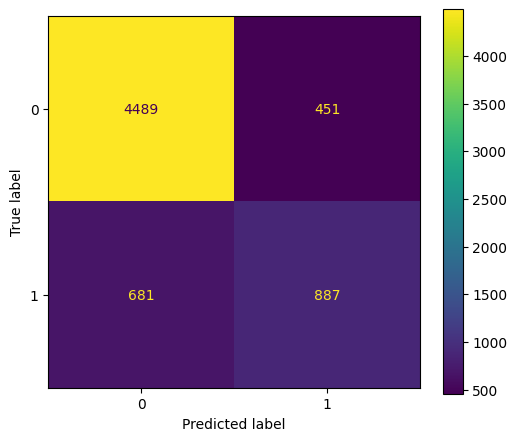

In [109]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [110]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4489  451]
 [ 681  887]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4940
           1       0.66      0.57      0.61      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508



## Elbow Method for Choosing Reasonable K Values

In [111]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [112]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

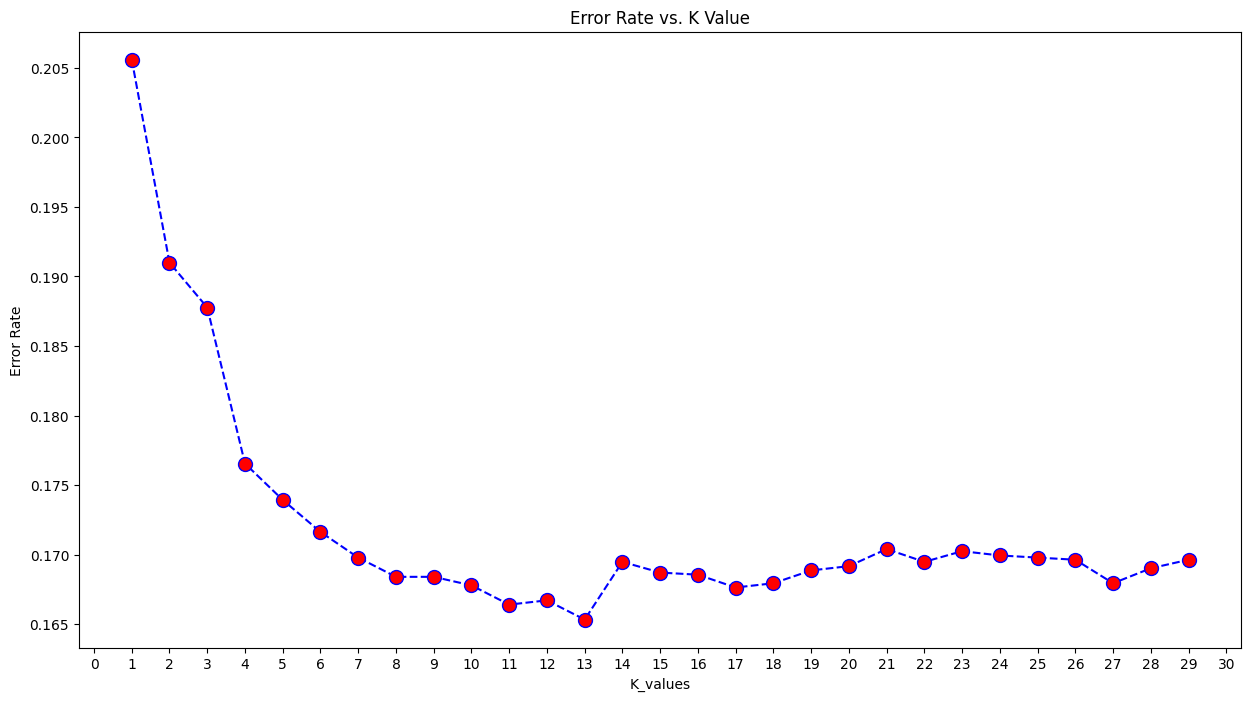

In [113]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

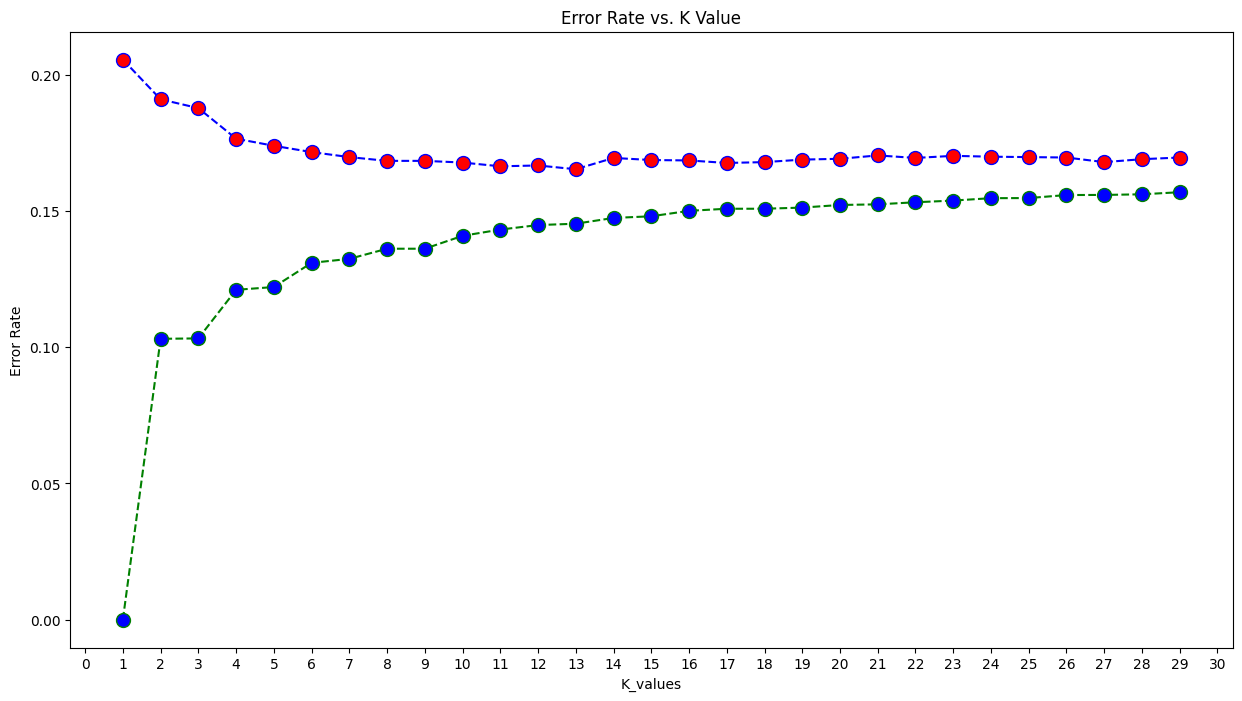

In [114]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

## Scores by Various K Values

*  **Gridsearch en iyi skoru aradığı için optimum k değerini kaçırabilir. Optimum skoru yakalarken, en yükseğe gidip bi düşüğüne gelir. Bu yüzden Elbow modeli sayesinde k = 9 değerini (modelin iş yükünü azaltacak skor) yakalar**

In [115]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [116]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[4608  332]
 [ 764  804]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4940
           1       0.71      0.51      0.59      1568

    accuracy                           0.83      6508
   macro avg       0.78      0.72      0.74      6508
weighted avg       0.82      0.83      0.82      6508


Train_Set

[[18758  1000]
 [ 2544  3727]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     19758
           1       0.79      0.59      0.68      6271

    accuracy                           0.86     26029
   macro avg       0.83      0.77      0.80     26029
weighted avg       0.86      0.86      0.86     26029



In [117]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train_scaled,y_train)
print('WITH K=14\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=14

Test_Set

[[4595  345]
 [ 758  810]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4940
           1       0.70      0.52      0.59      1568

    accuracy                           0.83      6508
   macro avg       0.78      0.72      0.74      6508
weighted avg       0.82      0.83      0.82      6508


Train_Set

[[18544  1214]
 [ 2624  3647]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     19758
           1       0.75      0.58      0.66      6271

    accuracy                           0.85     26029
   macro avg       0.81      0.76      0.78     26029
weighted avg       0.85      0.85      0.85     26029



In [118]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=26\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=26

Test_Set

[[4570  370]
 [ 733  835]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4940
           1       0.69      0.53      0.60      1568

    accuracy                           0.83      6508
   macro avg       0.78      0.73      0.75      6508
weighted avg       0.82      0.83      0.82      6508


Train_Set

[[18388  1370]
 [ 2618  3653]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19758
           1       0.73      0.58      0.65      6271

    accuracy                           0.85     26029
   macro avg       0.80      0.76      0.77     26029
weighted avg       0.84      0.85      0.84     26029



## Cross Validate For Optimal K Value

In [119]:
from sklearn.model_selection import cross_val_score, cross_validate

In [120]:
model = KNeighborsClassifier(n_neighbors=22)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.006,0.210,0.824,0.667,0.539,0.596
2,0.008,0.196,0.833,0.691,0.550,0.613
3,0.016,0.203,0.828,0.682,0.536,0.600
4,0.016,0.203,0.836,0.698,0.561,0.622
5,0.000,0.209,0.838,0.717,0.541,0.616
6,0.016,0.198,0.843,0.708,0.592,0.645
7,0.000,0.219,0.832,0.690,0.550,0.612
8,0.000,0.203,0.829,0.667,0.579,0.620
9,0.016,0.203,0.829,0.672,0.567,0.615
10,0.000,0.203,0.832,0.698,0.537,0.607


In [121]:
df_scores.mean()[2:]

test_accuracy    0.832
test_precision   0.689
test_recall      0.555
test_f1          0.615
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
knn_grid = KNeighborsClassifier()

In [124]:
k_values= range(1,30)

In [125]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [126]:
knn_grid_model = GridSearchCV(knn_grid, 
                              param_grid, 
                              cv=10, 
                              scoring= 'f1')

In [127]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [128]:
knn_grid_model.best_params_

{'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}

In [129]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set

[[4531  409]
 [ 696  872]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4940
           1       0.68      0.56      0.61      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508


Train_Set

[[18211  1547]
 [ 2481  3790]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     19758
           1       0.71      0.60      0.65      6271

    accuracy                           0.85     26029
   macro avg       0.80      0.76      0.78     26029
weighted avg       0.84      0.85      0.84     26029



## Evaluating ROC Curves and AUC

In [130]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [131]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

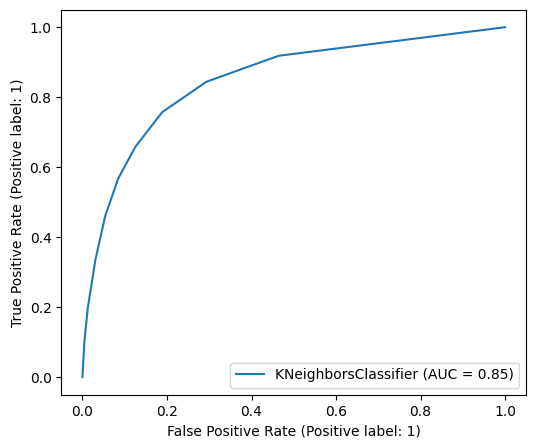

In [132]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [133]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8493761231719408

# Decision Tree Classification

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
DT_model = DecisionTreeClassifier(random_state=101)

In [136]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [137]:
y_pred = DT_model.predict(X_test)

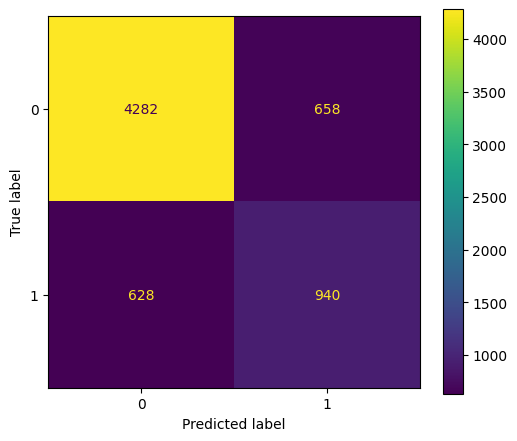

In [138]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt.show()

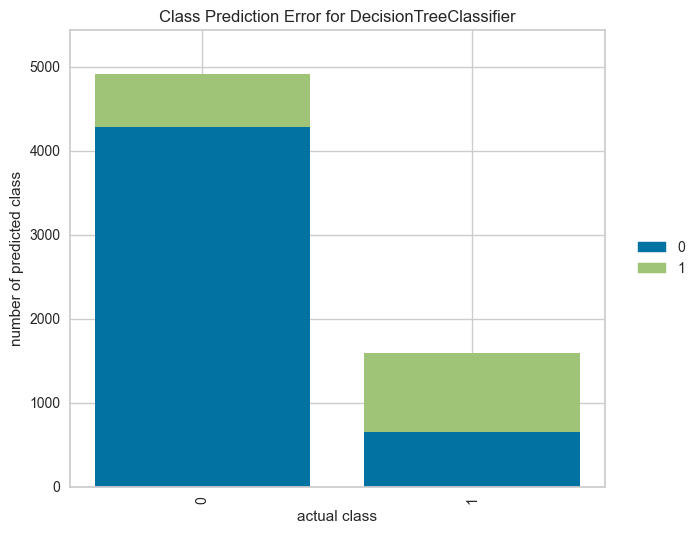

In [139]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor 

In [140]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set

[[4282  658]
 [ 628  940]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4940
           1       0.59      0.60      0.59      1568

    accuracy                           0.80      6508
   macro avg       0.73      0.73      0.73      6508
weighted avg       0.80      0.80      0.80      6508


Train_Set

[[19758     0]
 [    0  6271]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19758
           1       1.00      1.00      1.00      6271

    accuracy                           1.00     26029
   macro avg       1.00      1.00      1.00     26029
weighted avg       1.00      1.00      1.00     26029



micro avg/ Accuracy = Target daki sınıf sayılarım eşitse veya yakınsa (Balanced data)

macro avg  = datamda bir dengesizlik (unbalanced) varsa bakıyordum.

weight avg = eğer datam dengesiz/dengeli ancak ben sayısı yüksek olana göre bakmak istiyorsam kullanıyordum

## Cross Validate

Micro avg ile accuracy aynıdır. aşağıda ispatı mevcut

In [141]:
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.153,0.000,0.803,0.803,0.803,0.803
2,0.156,0.000,0.821,0.821,0.821,0.821
3,0.141,0.017,0.809,0.809,0.809,0.809
4,0.148,0.000,0.810,0.810,0.810,0.810
5,0.138,0.016,0.817,0.817,0.817,0.817
6,0.171,0.005,0.815,0.815,0.815,0.815
7,0.155,0.006,0.823,0.823,0.823,0.823
8,0.147,0.000,0.809,0.809,0.809,0.809
9,0.171,0.005,0.806,0.806,0.806,0.806
10,0.149,0.005,0.824,0.824,0.824,0.824


In [142]:
df_scores.mean()[2:]

test_accuracy          0.814
test_precision_micro   0.814
test_recall_micro      0.814
test_f1_micro          0.814
dtype: float64

## Feature Importances

In [143]:
DT_model.feature_importances_

array([1.21124023e-01, 1.80321510e-01, 1.23777087e-01, 5.42498932e-02,
       6.50978565e-02, 3.87455856e-03, 6.83396445e-03, 0.00000000e+00,
       1.07527756e-02, 6.30602306e-03, 1.03449459e-02, 5.27327419e-03,
       3.23034470e-04, 9.38086985e-04, 1.83416855e-03, 6.28049954e-04,
       5.78586469e-05, 5.75496433e-04, 1.97640218e-03, 1.13224114e-03,
       3.93319700e-03, 3.98239784e-03, 2.39502986e-02, 8.51809879e-03,
       5.17992370e-03, 1.98998468e-02, 2.09832619e-04, 8.67980629e-03,
       6.57776524e-03, 3.01065012e-03, 1.45453556e-04, 1.99338282e-01,
       9.26271979e-04, 1.23843214e-03, 8.14645525e-04, 8.60197159e-04,
       6.20860826e-03, 0.00000000e+00, 7.75255149e-03, 1.19135761e-02,
       2.38109276e-03, 2.73925441e-03, 6.09326339e-03, 6.11313925e-03,
       1.05038305e-04, 1.03369411e-02, 3.83130219e-03, 7.25326787e-03,
       5.28164397e-03, 7.08576698e-03, 3.15365637e-03, 2.57313935e-03,
       1.26283184e-03, 1.32261073e-03, 1.11658908e-03, 4.42825746e-03,
      

In [144]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
occupation_Armed-Forces,0.000
workclass_Never-worked,0.000
education_1st-4th,0.000
occupation_Priv-house-serv,0.000
marital_status_Married-AF-spouse,0.000
...,...
hours_per_week,0.065
age,0.121
capital_gain,0.124
fnlwgt,0.180


DT de eğer bir feature çok yüksek bir importance değerine sahipse onu düşürüp birde öyle skor alın sonra bunları karşılaştırın. Sebebi DT güçlü bulduğu featureler üzerinden ilerler diğerlerini kale almaz.

En önemlisi kanat uzunluğu ve gaga uzunluğu en önemli %90 oranında bizim için önemli

işte bu durum bizim modelimizin overfitting e gitmesine neden olabiliyor. DT önemli featurelerle eğer datanın örnke verecek olursak %90 ını ayırt edebiliyorsa diğer featureleri kullanmaz önemsizleştirir. Buda o featurelerden alacağımız insight lardan bizi yoksun bırakır.

hatırlarsanız modelimiz çok compexity olduğunda bizi overfittinge götürüyor demiştim. işte size bir overfitting sebebi daha eğer çok önemli bir feature varsa bu da bizi overfittinge götürebilir.

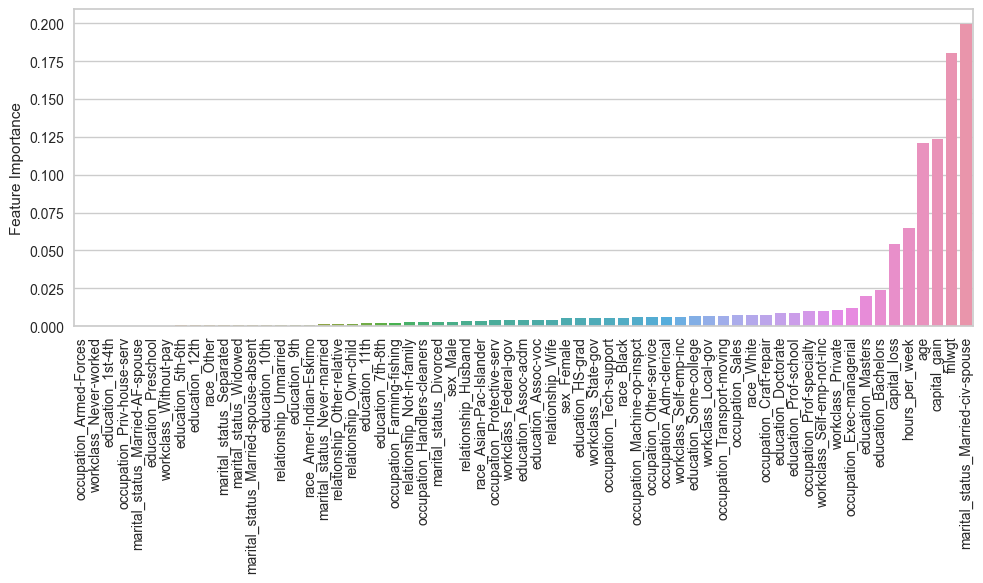

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Drop most important feature

In [146]:
X2 = X.drop(columns = ["marital_status_Married-civ-spouse"])

In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [148]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [149]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [150]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set

[[4294  629]
 [ 619  966]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4923
           1       0.61      0.61      0.61      1585

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508


Train_Set

[[19775     0]
 [    1  6253]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19775
           1       1.00      1.00      1.00      6254

    accuracy                           1.00     26029
   macro avg       1.00      1.00      1.00     26029
weighted avg       1.00      1.00      1.00     26029



In [151]:
df_f_i2 = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i2

,Feature Importance
occupation_Priv-house-serv,0.000
workclass_Never-worked,0.000
occupation_Armed-Forces,0.000
workclass_Without-pay,0.000
education_1st-4th,0.000
...,...
hours_per_week,0.067
age,0.128
capital_gain,0.130
relationship_Husband,0.160


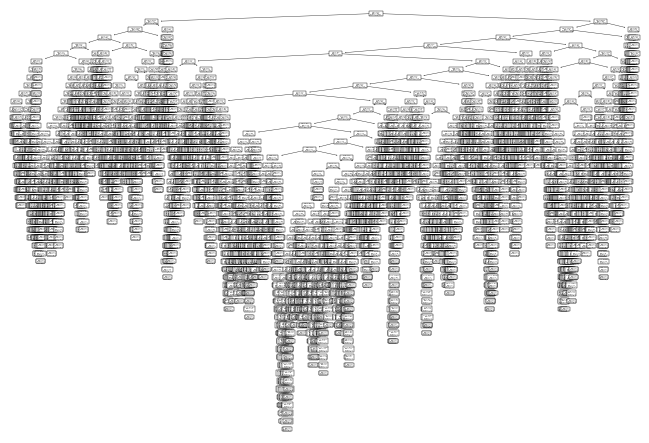

In [152]:
from sklearn.tree import plot_tree

plot_tree(DT_model);

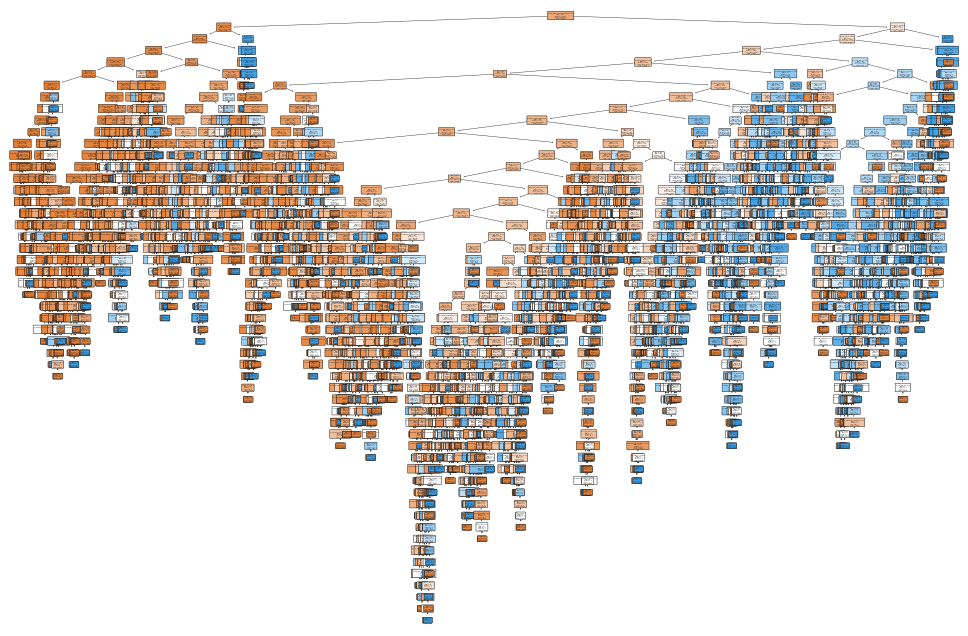

In [153]:
df["income"] = df["income"].map({0:"<=50K", 1: ">50K"}) 

plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, rounded=True, class_names=df.income.unique());
plt.show()

In [154]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

## Find Best Parameters

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
model = DecisionTreeClassifier(random_state=101)

In [157]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [158]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [159]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [160]:
grid_model.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [161]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set

[[4721  202]
 [ 805  780]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4923
           1       0.79      0.49      0.61      1585

    accuracy                           0.85      6508
   macro avg       0.82      0.73      0.76      6508
weighted avg       0.84      0.85      0.83      6508


Train_Set

[[18885   890]
 [ 3094  3160]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19775
           1       0.78      0.51      0.61      6254

    accuracy                           0.85     26029
   macro avg       0.82      0.73      0.76     26029
weighted avg       0.84      0.85      0.83     26029



# CONCLUSION



* Logistic Regression, diğer modellere göre daha dengeli bir performans sergilemektedir. Hem Test Set hem de Train Set üzerinde benzer değerlere sahiptir ve diğer metriklerin yanı sıra F1 skorları da makul seviyededir.
* KNN modeli, Test Set üzerindeki Recall değeri düşük olduğu için az temsil edilen sınıfı (1) yeterince iyi tahmin edemiyor gibi görünüyor.
* Decision Tree modeli, Test Set üzerindeki Recall değeri düşük olduğu için az temsil edilen sınıfı (1) yeterince iyi tahmin edemiyor gibi görünüyor. Fakat confusion matrix deki hata değerleri düşüktür

* Sonuç olarak Logistic Regression grid model sonucunda çıkan değerler bu dataseti özelinde çıkan en uygun değerlerdir. Recall ve f1 Skorlarının değerleri diğer modellerle karşılaştırıldığında en yüksek ve 0 ve 1 classlarında dengeli değerler alınmıştır.

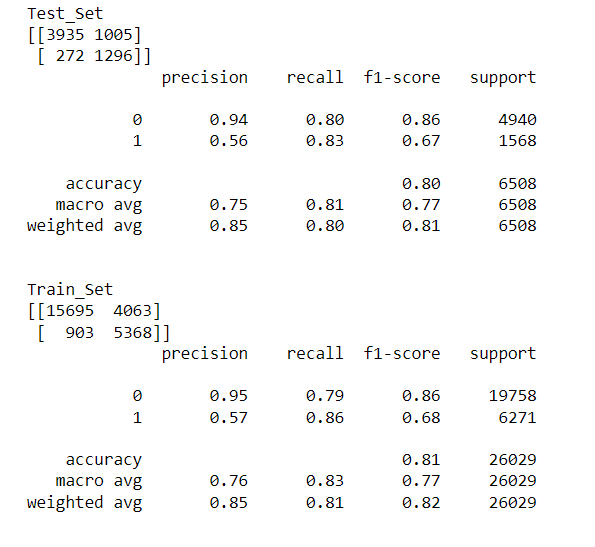